# Exploratory Data Analysis and Visualization using python 

In [11]:
import pandas as pd

# 1️ Load the cleaned csv file
df = pd.read_csv("superstore_cleaned.csv")


In [13]:
print(df.head())
print(df.info())

         Order ID       Product ID Order Date  Ship Date       Ship Mode  \
0  CA-2014-100006  TEC-PH-10002075   9/7/2014  9/13/2014  standard class   
1  CA-2014-100090  FUR-TA-10003715   7/8/2014  7/12/2014  standard class   
2  CA-2014-100090  OFF-BI-10001597   7/8/2014  7/12/2014  standard class   
3  CA-2014-100293  OFF-PA-10000176  3/14/2014  3/18/2014  standard class   
4  CA-2014-100328  OFF-BI-10000343  1/28/2014   2/3/2014  standard class   

  Customer ID     Customer Name      Segment        Country           City  \
0     dk13375       dennis kane     consumer  united states  new york city   
1     eb13705        ed braxton    corporate  united states  san francisco   
2     eb13705        ed braxton    corporate  united states  san francisco   
3     nf18475  neil französisch  home office  united states   jacksonville   
4     jc15340   jasper cacioppo     consumer  united states  new york city   

   ... Postal Code  Region         Category Sub-Category  \
0  ...       1

# PS1 – Find total sales and profit (descriptive stats)

In [16]:
# 3️ Descriptive statistics for numeric columns
print("\nDescriptive stats for numeric columns:\n")
print(df.describe())

# 4️ Total sales & total profit (PS1)
total_sales = df['Sales'].sum()
total_profit = df['Profit'].sum()

print(f"\n Total Sales: ${total_sales:,.2f}")
print(f" Total Profit: ${total_profit:,.2f}")

# 5️ Average profit margin
avg_profit_margin = df['Profit Margin'].mean()
print(f" Average Profit Margin: {avg_profit_margin:.2%}")


Descriptive stats for numeric columns:

        Postal Code         Sales    Quantity     Discount       Profit  \
count   9986.000000   9986.000000  9986.00000  9986.000000  9986.000000   
mean   55206.139595    230.042145     3.79261     0.156258    28.679854   
std    32066.718706    623.667519     2.23339     0.206499   234.394826   
min     1040.000000      0.444000     1.00000     0.000000 -6599.978000   
25%    23223.000000     17.248000     2.00000     0.000000     1.728000   
50%    57103.000000     54.432000     3.00000     0.200000     8.641350   
75%    90008.000000    209.937500     5.00000     0.200000    29.362500   
max    99301.000000  22638.480000    16.00000     0.800000  8399.976000   

       Profit Margin  
count    9986.000000  
mean        0.120185  
std         0.466894  
min        -2.750000  
25%         0.075000  
50%         0.270000  
75%         0.362500  
max         0.500000  

 Total Sales: $2,297,200.86
 Total Profit: $286,397.02
 Average Profit Marg

## what we find  
| Metric                    | Value                                  | Interpretation                                                                 |
| ------------------------- | -------------------------------------- | ------------------------------------------------------------------------------ |
| **Total Sales**           | **\$2,297,200.86**                     | That’s the total revenue generated.                                            |
| **Total Profit**          | **\$286,397.02**                       | This is how much profit was made overall.                                      |
| **Average Profit Margin** | **12.02%**                             | On average, \~12% of sales turn into profit.                                   |
| **Min / Max Profit**      | **-6,599.98 to 8,399.98**              | Some orders made a **loss** (negative profit) — worth deeper inspection later! |
| **Min / Max Sales**       | **\$0.44 to \$22,638.48**              | Very wide range — small & big orders both exist.                               |
| **Quantity**              | Avg: **3.79**, Min: **1**, Max: **16** | Orders are mostly small batch retail.                                          |
| **Discount**              | Avg: **15%**, Max: **80%**             | Deep discounts may impact profit — ties to PS4.                                |
| **Profit Margin Std Dev** | **0.47**                               | High variation — some orders much more/less profitable.                        |


# PS2 – Which regions generate the most sales? (univariate + barplot)

Region Order Counts:

Region
west       3202
east       2845
central    2323
south      1616
Name: count, dtype: int64

---------------------------

Region Sales & Profit Totals:

               Sales       Profit
Region                           
west     725457.8245  108418.4489
east     678781.2400   91522.7800
central  501239.8908   39706.3625
south    391721.9050   46749.4303

---------------------------



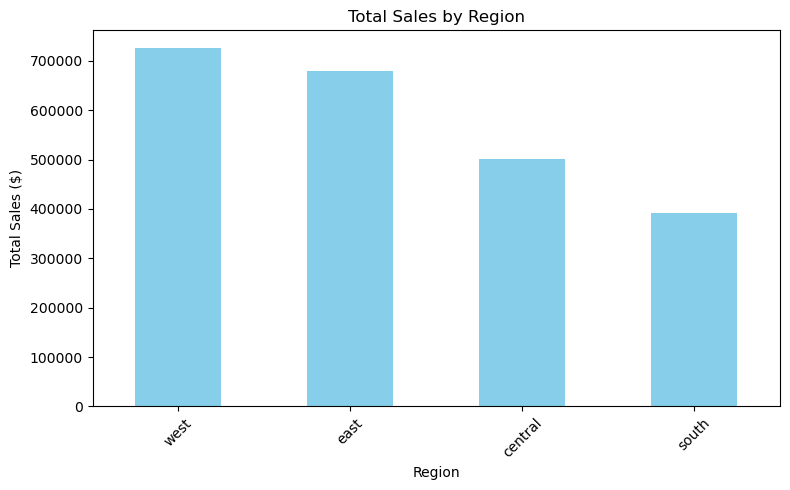

In [26]:
import matplotlib.pyplot as plt

# Region analysis - frequency count
print("Region Order Counts:\n")
print(df['Region'].value_counts())
print("\n---------------------------\n")

# Region analysis - sales and profit sum table
region_grouped = df.groupby('Region')[['Sales', 'Profit']].sum().sort_values(by='Sales', ascending=False)
print("Region Sales & Profit Totals:\n")
print(region_grouped)
print("\n---------------------------\n")

# Region analysis - barplot for Sales
plt.figure(figsize=(8,5))
region_grouped['Sales'].plot(kind='bar', color='skyblue')
plt.title('Total Sales by Region')
plt.ylabel('Total Sales ($)')
plt.xlabel('Region')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()



# Quick Insights of PS2
The West region contributes the highest total sales.

The South region has the lowest total sales.

The profit also follows the same pattern overall.

Possible action we can take: Why is the South lagging? Should we investigate customer base, product mix, or shipping issues?

# PS3: “Which product categories and sub-categories drive the most sales and profit?”


Category Order Counts:

Category
office supplies    6022
furniture          2119
technology         1845
Name: count, dtype: int64

Category Sales:

Category
technology         836154.0330
furniture          741999.7953
office supplies    719047.0320
Name: Sales, dtype: float64

Category Profit:

Category
technology         145454.9481
office supplies    122490.8008
furniture           18451.2728
Name: Profit, dtype: float64


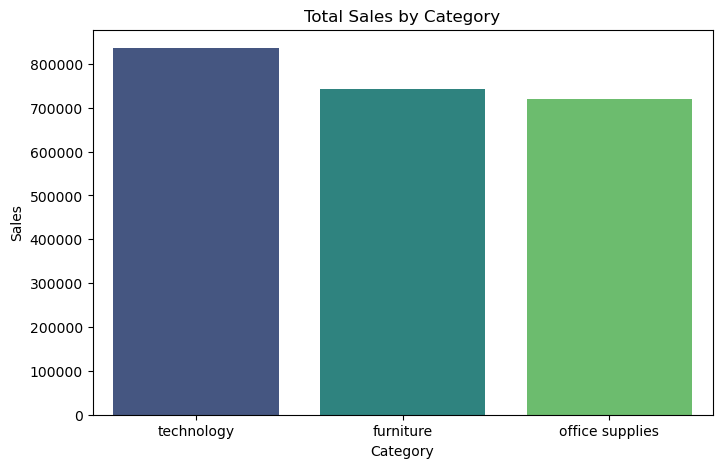

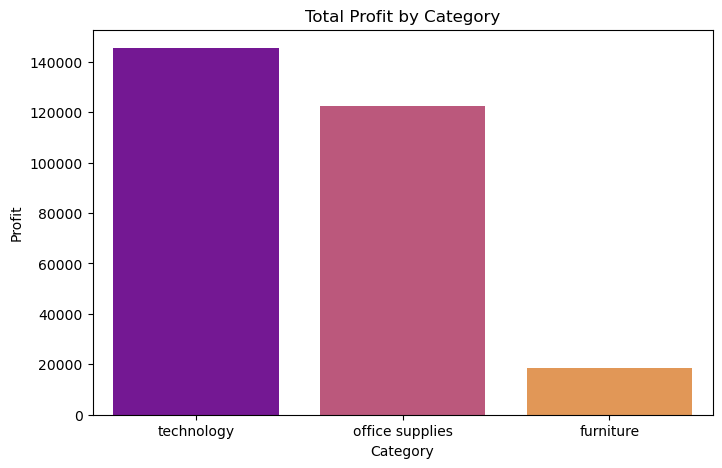


Sub-Category Order Counts:

Sub-Category
binders        1522
paper          1368
furnishings     956
phones          889
storage         845
art             796
accessories     773
chairs          616
appliances      466
labels          364
tables          319
envelopes       254
bookcases       228
fasteners       217
supplies        190
machines        115
copiers          68
Name: count, dtype: int64

Sub-Category Sales:

Sub-Category
phones         330007.0540
chairs         328449.1030
storage        223843.6080
tables         206965.5320
binders        203412.7330
machines       189238.6310
accessories    167380.3180
copiers        149528.0300
bookcases      114879.9963
appliances     107532.1610
furnishings     91705.1640
paper           78479.2060
supplies        46673.5380
art             27118.7920
envelopes       16476.4020
labels          12486.3120
fasteners        3024.2800
Name: Sales, dtype: float64

Sub-Category Profit:

Sub-Category
copiers        55617.8249
phones  

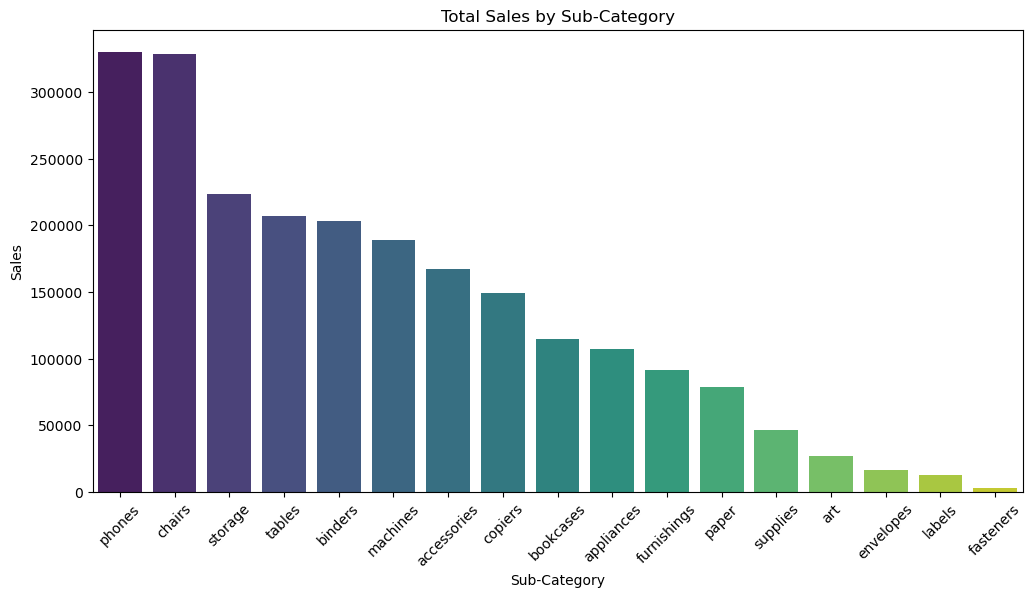

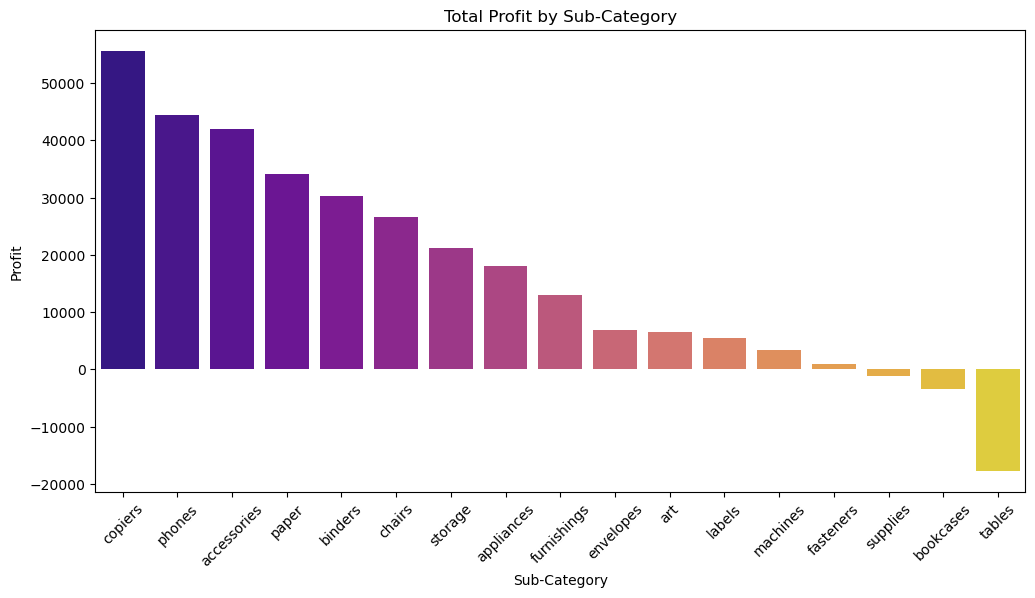

In [34]:
import seaborn as sns
import matplotlib.pyplot as plt

# Category analysis
print("\nCategory Order Counts:\n")
print(df['Category'].value_counts())

category_sales = df.groupby('Category')['Sales'].sum().sort_values(ascending=False)
category_profit = df.groupby('Category')['Profit'].sum().sort_values(ascending=False)

print("\nCategory Sales:\n")
print(category_sales)
print("\nCategory Profit:\n")
print(category_profit)

# Category Sales Barplot
plt.figure(figsize=(8, 5))
sns.barplot(
    x=category_sales.index,
    y=category_sales.values,
    hue=category_sales.index,
    palette='viridis',
    legend=False
)
plt.title('Total Sales by Category')
plt.ylabel('Sales')
plt.show()

# Category Profit Barplot
plt.figure(figsize=(8, 5))
sns.barplot(
    x=category_profit.index,
    y=category_profit.values,
    hue=category_profit.index,
    palette='plasma',
    legend=False
)
plt.title('Total Profit by Category')
plt.ylabel('Profit')
plt.show()

# Sub-Category analysis
print("\nSub-Category Order Counts:\n")
print(df['Sub-Category'].value_counts())

subcat_sales = df.groupby('Sub-Category')['Sales'].sum().sort_values(ascending=False)
subcat_profit = df.groupby('Sub-Category')['Profit'].sum().sort_values(ascending=False)

print("\nSub-Category Sales:\n")
print(subcat_sales)
print("\nSub-Category Profit:\n")
print(subcat_profit)

# Sub-Category Sales Barplot
plt.figure(figsize=(12, 6))
sns.barplot(
    x=subcat_sales.index,
    y=subcat_sales.values,
    hue=subcat_sales.index,
    palette='viridis',
    legend=False
)
plt.title('Total Sales by Sub-Category')
plt.ylabel('Sales')
plt.xticks(rotation=45)
plt.show()

# Sub-Category Profit Barplot
plt.figure(figsize=(12, 6))
sns.barplot(
    x=subcat_profit.index,
    y=subcat_profit.values,
    hue=subcat_profit.index,
    palette='plasma',
    legend=False
)
plt.title('Total Profit by Sub-Category')
plt.ylabel('Profit')
plt.xticks(rotation=45)
plt.show()


# PS4 Which ship modes are most popular and profitable?

Ship Mode Order Counts:

Ship Mode
standard class    5964
second class      1942
first class       1537
same day           543
Name: count, dtype: int64


Ship Mode Sales & Profit:

                       Sales       Profit
Ship Mode                                
first class     3.514284e+05   48969.8399
same day        1.283631e+05   15891.7589
second class    4.591936e+05   57446.6354
standard class  1.358216e+06  164088.7875




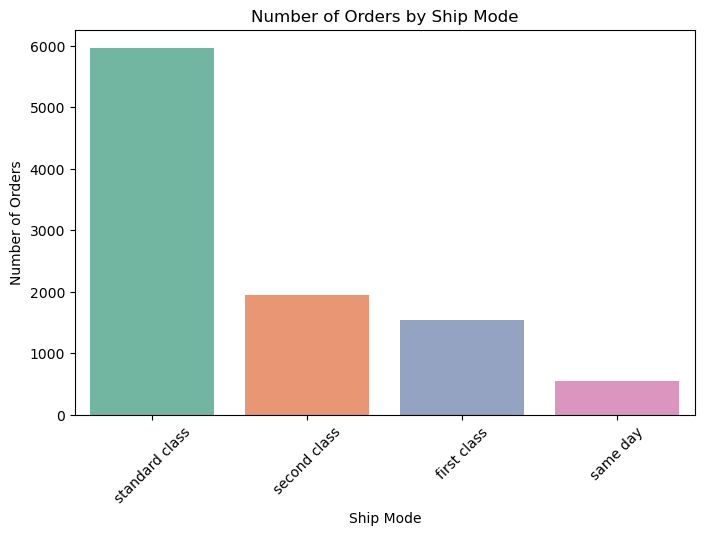

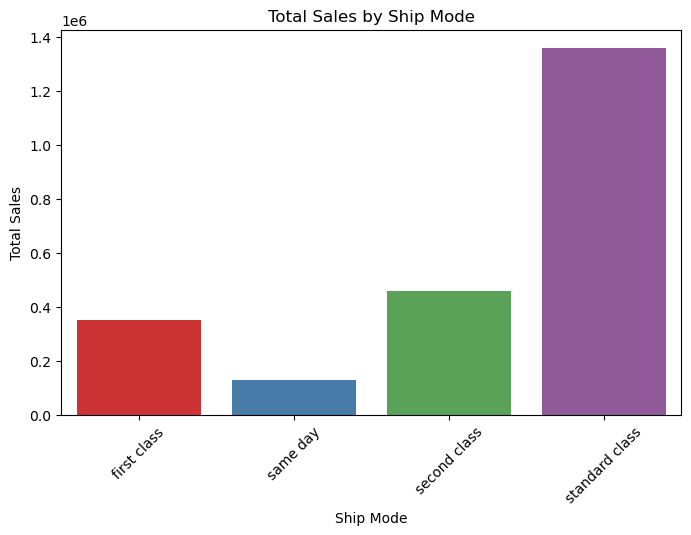

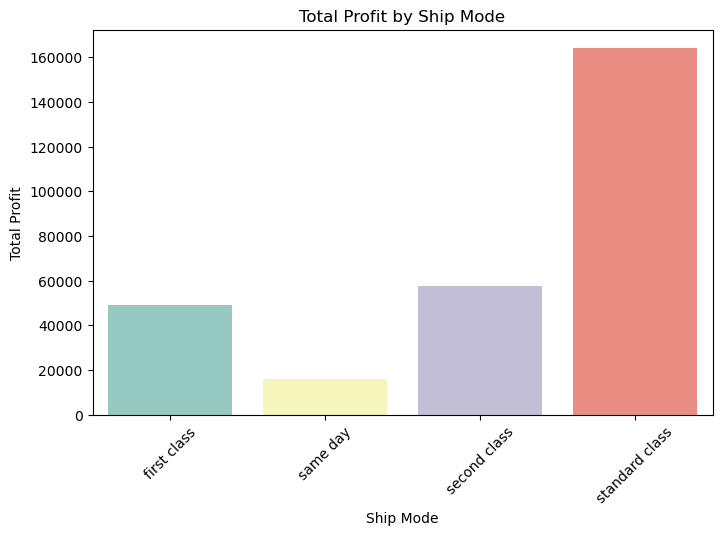

In [45]:
import seaborn as sns
import matplotlib.pyplot as plt

# 1️ Order counts by Ship Mode
print("Ship Mode Order Counts:\n")
print(df['Ship Mode'].value_counts())
print("\n")

# 2️ Sales and Profit by Ship Mode
print("Ship Mode Sales & Profit:\n")
print(df.groupby('Ship Mode')[['Sales', 'Profit']].sum())
print("\n")

# 3️ Barplot: Ship Mode Orders
shipmode_counts = df['Ship Mode'].value_counts()
plt.figure(figsize=(8, 5))
sns.barplot(x=shipmode_counts.index, y=shipmode_counts.values, hue=shipmode_counts.index, palette='Set2', legend=False)
plt.title('Number of Orders by Ship Mode')
plt.xlabel('Ship Mode')
plt.ylabel('Number of Orders')
plt.xticks(rotation=45)
plt.show()

# 4️ Barplot: Ship Mode Sales
shipmode_sales = df.groupby('Ship Mode')['Sales'].sum()
plt.figure(figsize=(8, 5))
sns.barplot(x=shipmode_sales.index, y=shipmode_sales.values, hue=shipmode_sales.index, palette='Set1', legend=False)
plt.title('Total Sales by Ship Mode')
plt.xlabel('Ship Mode')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.show()

# 5️ Barplot: Ship Mode Profit
shipmode_profit = df.groupby('Ship Mode')['Profit'].sum()
plt.figure(figsize=(8, 5))
sns.barplot(x=shipmode_profit.index, y=shipmode_profit.values, hue=shipmode_profit.index, palette='Set3', legend=False)
plt.title('Total Profit by Ship Mode')
plt.xlabel('Ship Mode')
plt.ylabel('Total Profit')
plt.xticks(rotation=45)
plt.show() 


# PS5  Which shipping mode is most popular? (univariate)

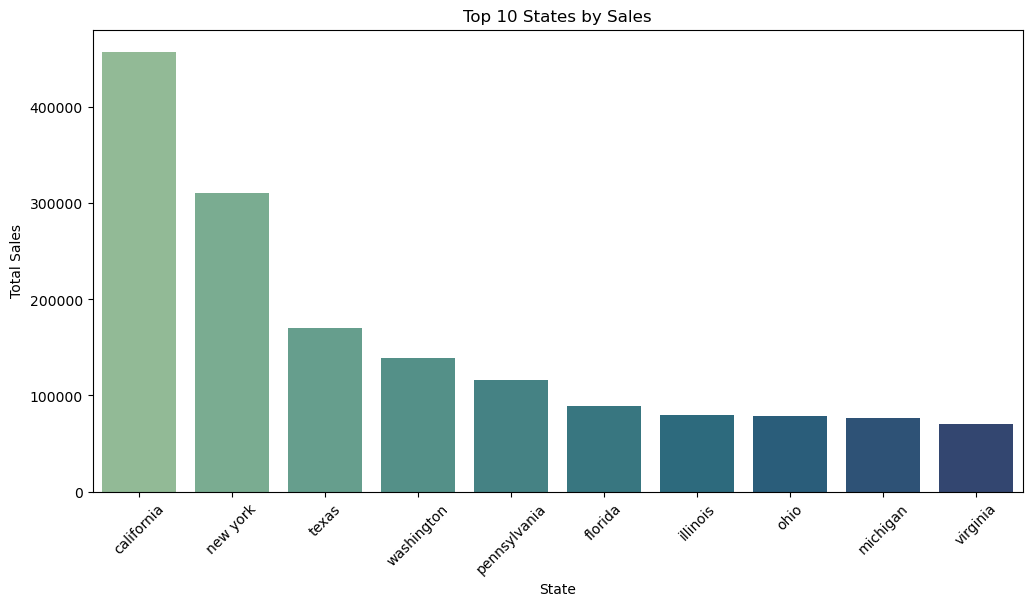

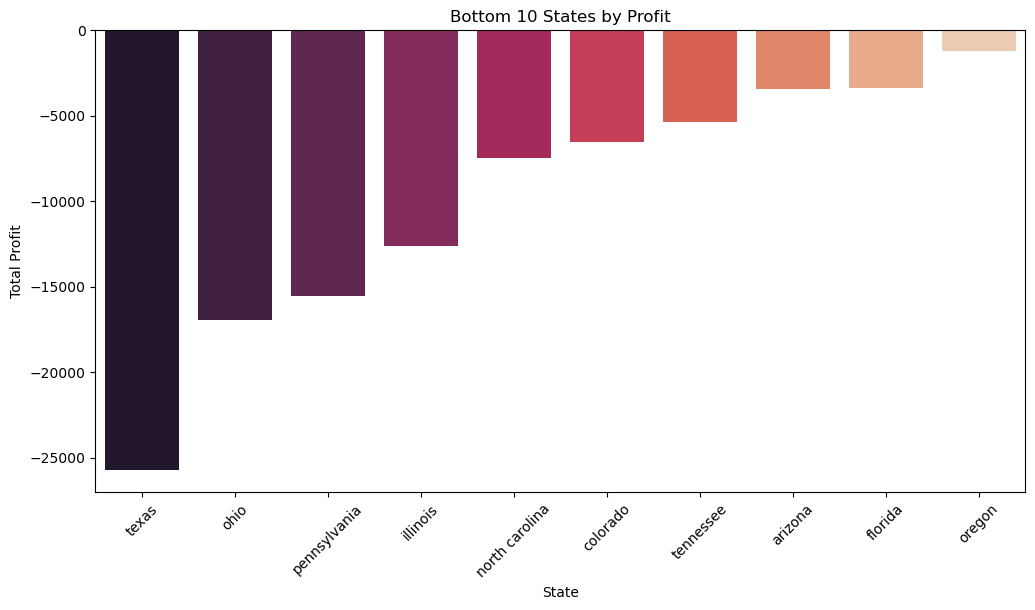

In [54]:
# Top 10 States by Sales 
plt.figure(figsize=(12, 6))
sns.barplot(
    x=top_states_sales.index,
    y=top_states_sales.values,
    hue=top_states_sales.index,  
    dodge=False,
    legend=False,
    palette='crest'
)
plt.xticks(rotation=45)
plt.title('Top 10 States by Sales')
plt.xlabel('State')
plt.ylabel('Total Sales')
plt.show()

# Bottom 10 States by Profit 
plt.figure(figsize=(12, 6))
sns.barplot(
    x=bottom_states_profit.index,
    y=bottom_states_profit.values,
    hue=bottom_states_profit.index,
    dodge=False,
    legend=False,
    palette='rocket'
)
plt.xticks(rotation=45)
plt.title('Bottom 10 States by Profit')
plt.xlabel('State')
plt.ylabel('Total Profit')
plt.show()


# PS 6 How does discount affect profit? Is there a strong correlation? 

Correlation between Discount and Profit: -0.2195


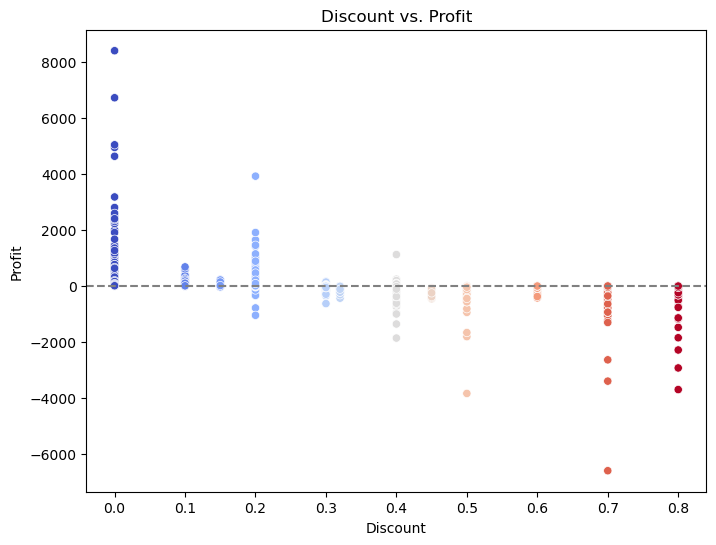

In [57]:
# Calculate correlation
corr = df['Discount'].corr(df['Profit'])
print(f"Correlation between Discount and Profit: {corr:.4f}")

# Scatterplot
plt.figure(figsize=(8,6))
sns.scatterplot(data=df, x='Discount', y='Profit', hue='Discount', palette='coolwarm', legend=False)
plt.title('Discount vs. Profit')
plt.xlabel('Discount')
plt.ylabel('Profit')
plt.axhline(0, color='gray', linestyle='--')
plt.show()



# visulization 

# PS07 – Monthly Sales Trend (Lineplot)

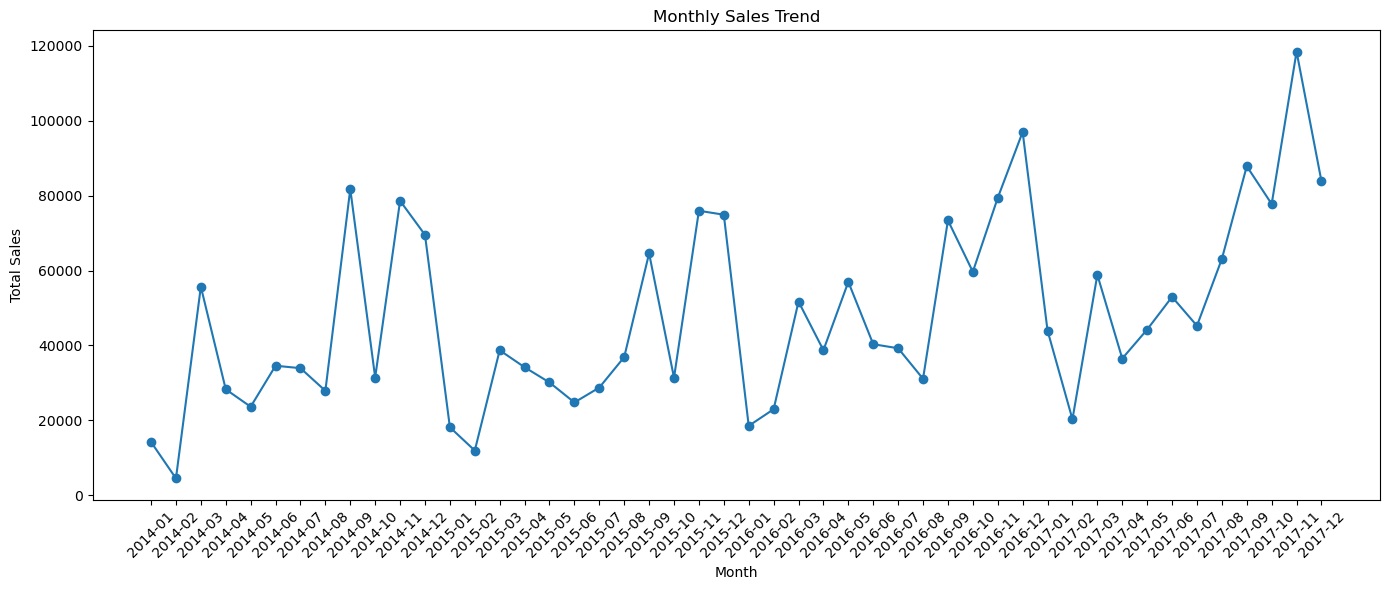

In [69]:
import pandas as pd
import matplotlib.pyplot as plt

# Make sure Order Date is datetime
df['Order Date'] = pd.to_datetime(df['Order Date'])

# Group by Month
df['YearMonth'] = df['Order Date'].dt.to_period('M')
monthly_sales = df.groupby('YearMonth')['Sales'].sum().reset_index()

# Plot
plt.figure(figsize=(14,6))
plt.plot(monthly_sales['YearMonth'].astype(str), monthly_sales['Sales'], marker='o')
plt.xticks(rotation=45)
plt.title('Monthly Sales Trend')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.tight_layout()
plt.show()


#  PS08 – Visualize the correlation matrix between numeric variables to check relationships visually. (Heatmap)

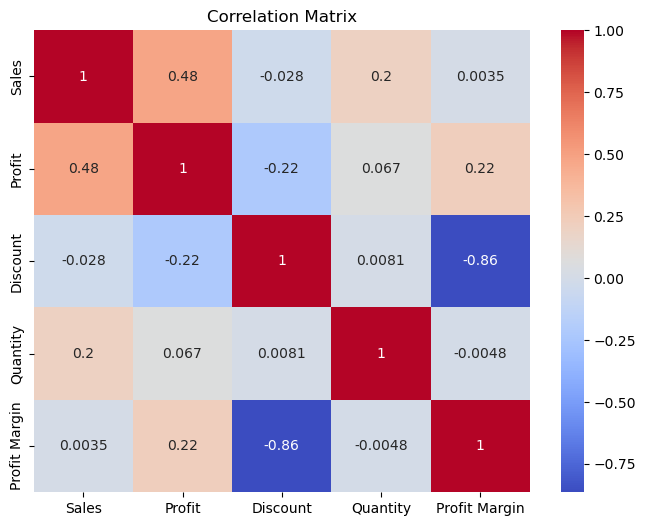

In [73]:
import seaborn as sns

plt.figure(figsize=(8,6))
sns.heatmap(df[['Sales', 'Profit', 'Discount', 'Quantity', 'Profit Margin']].corr(),
            annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


# PS 09 Explore the distribution of Profit, Discount, and Quantity to check for outliers or skewness. (Histogram)

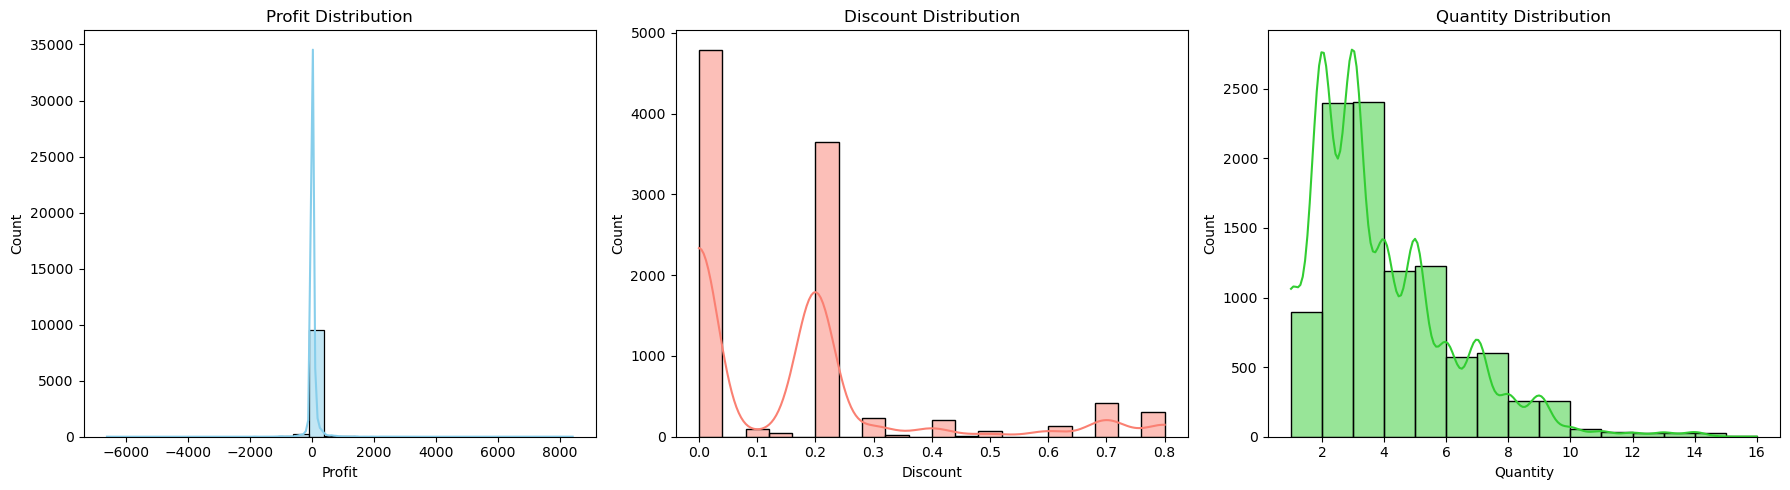

In [76]:
fig, axs = plt.subplots(1, 3, figsize=(18,5))

# Profit
sns.histplot(df['Profit'], bins=30, kde=True, ax=axs[0], color='skyblue')
axs[0].set_title('Profit Distribution')

# Discount
sns.histplot(df['Discount'], bins=20, kde=True, ax=axs[1], color='salmon')
axs[1].set_title('Discount Distribution')

# Quantity
sns.histplot(df['Quantity'], bins=15, kde=True, ax=axs[2], color='limegreen')
axs[2].set_title('Quantity Distribution')

plt.tight_layout()
plt.show()


# PS10 – Profit Spread by Category & Region 

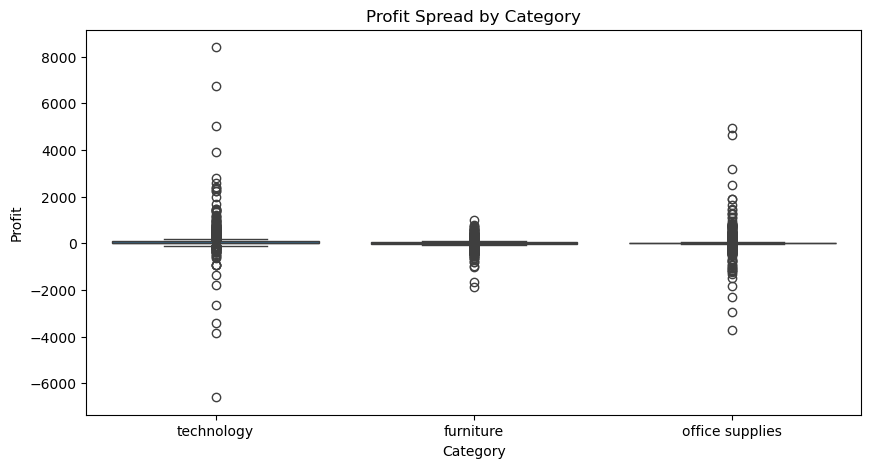

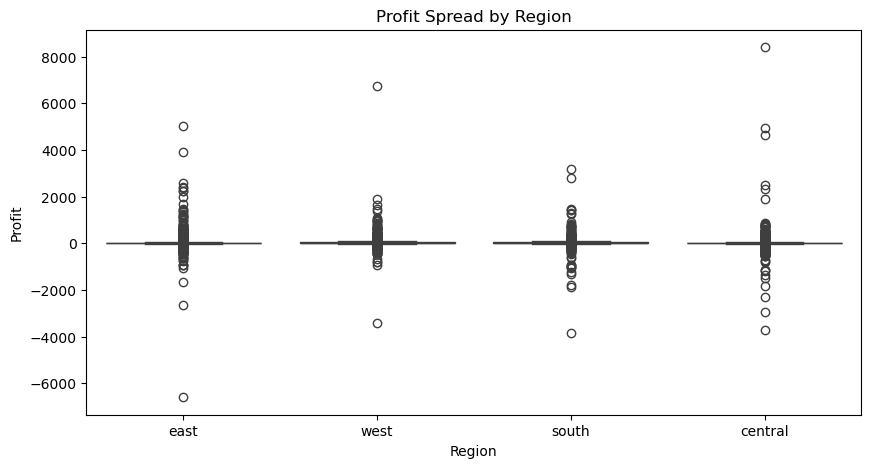

In [79]:
# By Category
plt.figure(figsize=(10,5))
sns.boxplot(x='Category', y='Profit', data=df)
plt.title('Profit Spread by Category')
plt.show()

# By Region
plt.figure(figsize=(10,5))
sns.boxplot(x='Region', y='Profit', data=df)
plt.title('Profit Spread by Region')
plt.show()


# PS 11 Visualize the share of each Ship Mode to understand shipping preferences. (Pie Chart)

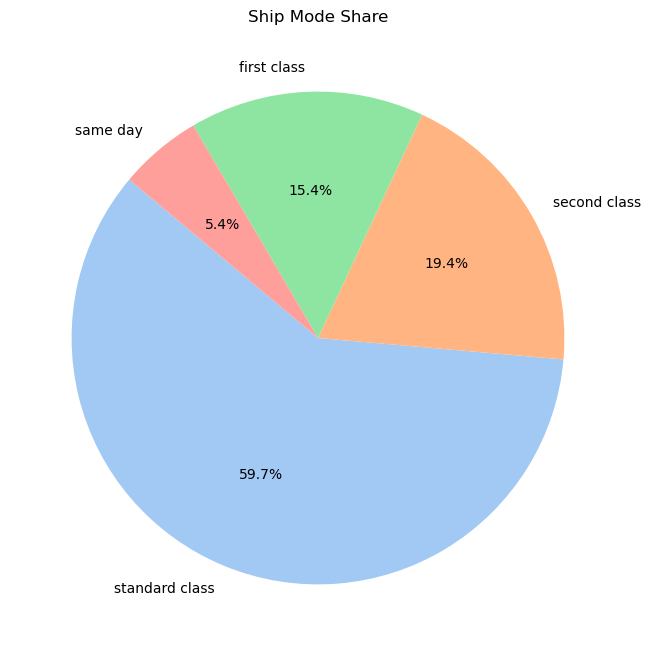

In [84]:
ship_mode_counts = df['Ship Mode'].value_counts()

plt.figure(figsize=(8,8))
plt.pie(ship_mode_counts, labels=ship_mode_counts.index, autopct='%1.1f%%',
        startangle=140, colors=sns.color_palette('pastel'))
plt.title('Ship Mode Share')
plt.show()


# PS 12 Identify the top 10 customers by sales or profit to highlight key accounts. (Barplot)


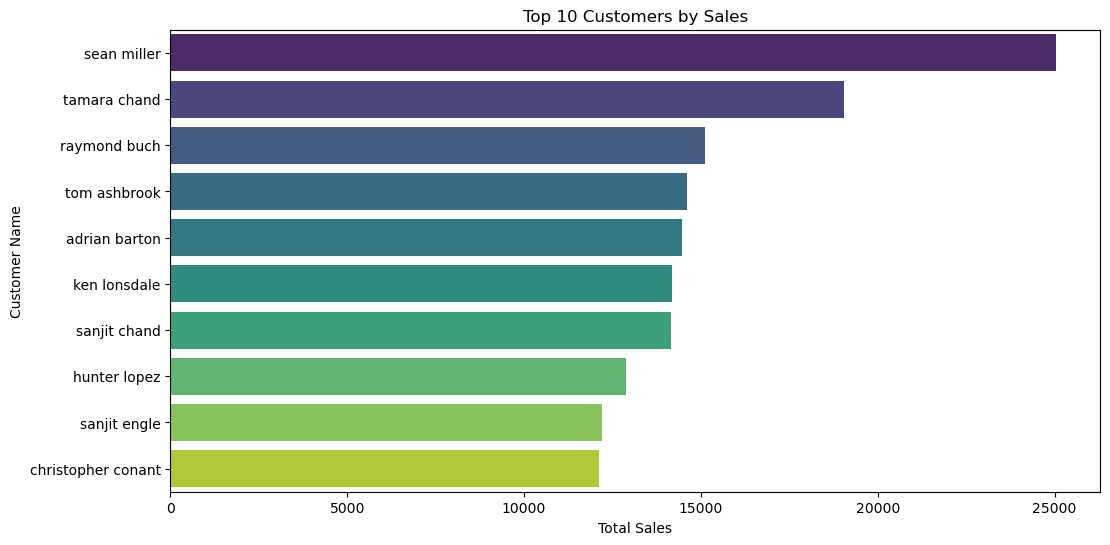

In [89]:
plt.figure(figsize=(12,6))
sns.barplot(
    x=top_customers.values,
    y=top_customers.index,
    hue=top_customers.index,   
    palette='viridis',
    legend=False               
)
plt.title('Top 10 Customers by Sales')
plt.xlabel('Total Sales')
plt.ylabel('Customer Name')
plt.show()

